In [12]:
#working with
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import HTML, display


__The World Cup Athelete__<br>
World cup national teams are composed of players that spend most of their time and game minutes<br>
playing for a variety of clubs in different countries and leagues of different quality.<br>

<table><tr><td><img src="eplclubs1.gif" width= "125"></td><td><img src='LixS.gif' width= "125"></td><td><img src='mls.gif' width= "125"></td><td><img src='seriea.gif' width= "125"></td><td><img src='ligamx.gif' width= "125"></td></tr></table>

Players can play in 40 league games in a season depending on the size of the league they play in.<br>
This provides a much larger sample size of to measure individual performances than the limited international schedule.<br>

For my analysis I wanted to discover if the dominance of the players league performances aggregated <br>
to their international clubs related to the success of the international clubs in the World Cup.<br>

There was not much data available from API's.  As it turns out, no one's investing much in distrubiting<br>
the results of the Cypriot First division soccer league.


__Results of Sports Monk API Cost/Benefit analysis__

__150 Euros__

![fbdown.gif](fbdown.gif)
<br>
<br>
<br>
__170 Bucks!__
![cba.gif](cba.gif)








__Wikipedida !!!__
0$ and lots of CONTROL C, CONTROL V action!

![thumbsup.gif](thumbsup.gif)<br>
![colb.gif](colb.gif)<br>


In [13]:
#import data
#2010
squads_2010_df = pd.read_excel(open('Playerdata.xlsx','rb'), sheet_name='2010 Squads')
squads_2010_df = squads_2010_df[['WC Country', 'Player', 'Club Country','Club Name']].set_index(['Player']).copy()
leagues_2010_df = pd.read_excel(open('Playerdata.xlsx','rb'), sheet_name='2010 League Tables')
leagues_2010_df = leagues_2010_df[['Club Country', 'Club Name', 'Win %','GD Ratio','Table Percentile','Club Power Ranking']].set_index(['Club Name']).copy()
results_2010_df = pd.read_excel(open('Playerdata.xlsx','rb'), sheet_name='2010 WC Standings')
results_2010_df = results_2010_df[['WC Country','Standings','Group','Pts']].set_index(['WC Country']).copy()

#2014
squads_2014_df = pd.read_excel(open('Playerdata.xlsx','rb'), sheet_name='2014 Squads')
squads_2014_df = squads_2014_df[['WC Country', 'Player', 'Club Country','Club Name']].set_index(['Player']).copy()
leagues_2014_df = pd.read_excel(open('Playerdata.xlsx','rb'), sheet_name='2014 League Tables')
leagues_2014_df = leagues_2014_df[['Club Country', 'Club Name', 'Win %','GD Ratio','Table Percentile','Club Power Ranking']].set_index(['Club Name']).copy()
results_2014_df = pd.read_excel(open('Playerdata.xlsx','rb'), sheet_name='2014 WC Standings')
results_2014_df = results_2014_df[['WC Country','Standings','Group','Pts']].set_index(['WC Country']).copy()

#2018
squads_2018_df = pd.read_excel(open('Playerdata.xlsx','rb'), sheet_name='2018 Squads')
squads_2018_df = squads_2018_df[['WC Country', 'Player', 'Club Country','Club Name']].set_index(['Player']).copy()
leagues_2018_df = pd.read_excel(open('Playerdata.xlsx','rb'), sheet_name='2018 League Tables')
leagues_2018_df = leagues_2018_df[['Club Country', 'Club Name', 'Win %','GD Ratio','Table Percentile','Club Power Ranking']].set_index(['Club Name']).copy()



regional_mods_df = pd.read_excel(open('Playerdata.xlsx','rb'), sheet_name='Regional Modifiers')
league_country = pd.read_excel(open('Playerdata.xlsx','rb'), sheet_name='League Countries')
league_country= league_country[['Club Country','League_Country_Mod']].set_index(['Club Country']).copy()


In [14]:
#create 2010 Data Frame

players_2010_club_score_df=pd.merge(squads_2010_df,leagues_2010_df[['Win %','GD Ratio','Table Percentile','Club Power Ranking']], on="Club Name", how="left")
players_2010_club_score_df=pd.merge(players_2010_club_score_df,results_2010_df[['Standings']], on="WC Country", how="left")
wc_country_rating_2010=players_2010_club_score_df.groupby('WC Country')[['Win %']].mean()
wc_country_rating_2010.loc[:,'Table_Pcnt_Avg']=players_2010_club_score_df.groupby('WC Country')[['Table Percentile']].mean()
wc_country_rating_2010.loc[:,'GD_Ratio_Avg']=players_2010_club_score_df.groupby('WC Country')[['GD Ratio']].mean()
wc_country_rating_2010.loc[:,'Win_Pct_Avg']=players_2010_club_score_df.groupby('WC Country')[['Win %']].mean()
wc_country_rating_2010.loc[:,'CPR_Avg']=players_2010_club_score_df.groupby('WC Country')[['Club Power Ranking']].mean()
wc_country_rating_2010.loc[:,'WC_Finish']=players_2010_club_score_df.groupby('WC Country')[['Standings']].min()

wc_country_rating_2010_df=wc_country_rating_2010.sort_values('CPR_Avg',ascending = False)


              WC_Finish  GD_Ratio_Avg
WC_Finish      1.000000     -0.403226
GD_Ratio_Avg  -0.403226      1.000000


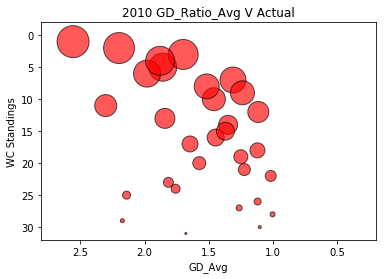

In [15]:
#2010 GD analysis
GD_data = wc_country_rating_2010[['WC_Finish','GD_Ratio_Avg']]
DG_cor =GD_data.corr(method='spearman')

plt.scatter(wc_country_rating_2010.GD_Ratio_Avg,wc_country_rating_2010.WC_Finish,facecolors="red",s=(33-(wc_country_rating_2010.WC_Finish))**2, edgecolors="black",alpha=0.65)

plt.ylim(32,-2)  # decreasing time
plt.xlim(max(wc_country_rating_2010.GD_Ratio_Avg)+.25, .2)  # decreasing time
plt.title("2010 GD_Ratio_Avg V Actual")
plt.xlabel("GD_Avg")
plt.ylabel("WC Standings", multialignment='center')
plt.savefig("2010 Goal Differential V Actual.png")
print(DG_cor)
plt.show()


In [3]:
#2010 Table Finish analysis
win_data = wc_country_rating_2010[['WC_Finish','Table_Pcnt_Avg']]
Table_Finish_cor = win_data.corr(method='spearman')

plt.scatter(wc_country_rating_2010.Table_Pcnt_Avg,wc_country_rating_2010.WC_Finish,facecolors="red",s=(33-(wc_country_rating_2010.WC_Finish))**2, edgecolors="black",alpha=0.65)

plt.ylim(32,-2)  # decreasing time
plt.xlim(max(wc_country_rating_2010.Table_Pcnt_Avg)+.05,min(wc_country_rating_2010.Table_Pcnt_Avg)-.05)  # decreasing time
plt.title("2010 Table_Pcnt_Avg V Actual")
plt.xlabel("Table_Pcnt_Avg")
plt.ylabel("WC Standings", multialignment='center')
plt.savefig("2010 Table_Pcnt_Avg V Actual.png")

print(Table_Finish_cor)
plt.show()

NameError: name 'wc_country_rating_2010' is not defined

In [4]:
#2010 Win Pct Analysis
data = wc_country_rating_2010[['WC_Finish','Win_Pct_Avg']]
correlation = data.corr(method='pearson')
print(correlation)
plt.scatter(wc_country_rating_2010.Win_Pct_Avg,wc_country_rating_2010.WC_Finish,facecolors="red",s=(33-(wc_country_rating_2010.WC_Finish))**2, edgecolors="black",alpha=0.65)

plt.ylim(32,-2)  # decreasing time
plt.xlim(max(wc_country_rating_2010.Win_Pct_Avg)+.05,min(wc_country_rating_2010.Win_Pct_Avg)-.05)  # decreasing time
plt.title("2010 Win_Pct_Avg V Actual")
plt.xlabel("Win%_Avg")
plt.ylabel("WC Standings", multialignment='center')
plt.savefig("2010 Win_Pct_Avg V Actual.png")
    
plt.show()

NameError: name 'wc_country_rating_2010' is not defined

           WC_Finish   CPR_Avg
WC_Finish   1.000000 -0.384762
CPR_Avg    -0.384762  1.000000


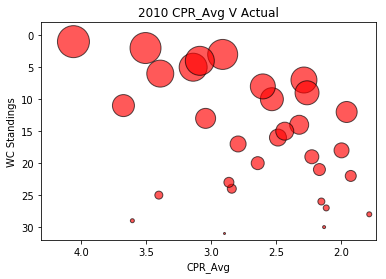

In [8]:
#2010 CPR_Avg
data = wc_country_rating_2010[['WC_Finish','CPR_Avg']]
cpr_correlation = data.corr(method='pearson')


plt.scatter(wc_country_rating_2010.CPR_Avg,wc_country_rating_2010.WC_Finish,facecolors="red",s=(33-(wc_country_rating_2010.WC_Finish))**2, edgecolors="black",alpha=0.65)

plt.title("2010 CPR_Avg V Actual")
plt.xlabel("CPR_Avg")
plt.ylabel("WC Standings", multialignment='center')
plt.ylim(32,-2)  # decreasing time
plt.xlim(max(wc_country_rating_2010.CPR_Avg)+.25,min(wc_country_rating_2010.CPR_Avg)-.05)  
plt.savefig("2010 CPR_Avg V Actual.png")
print(cpr_correlation)
plt.show()


__2010 Analysis__<br>
<table><tr><td><img src="2010 Table_Pcnt_Avg V Actual.png" width= "350"></td><td><img src="2010 Win Pct V Actual.png" width= "350"></td><td><img src='2010 Goal Differential V Actual.png' width= "350"></td><td><img src='2010 CPR_Avg V Actual.png' width= "350"></tr></table>

Although table percentage had the highest correlation it did not pick the winner accurately in 2010<br>
It was the combined Club Power Ranking that correctly predicted Spain's first place finish.<br>


In [9]:
wc_country_rating_2010_df.head(5)

,Win %,Table_Pcnt_Avg,GD_Ratio_Avg,Win_Pct_Avg,CPR_Avg,WC_Finish
WC Country,,,,,,
Spain,0.663616,0.841304,2.556336,0.663616,4.061256,1
Portugal,0.594355,0.780254,2.302176,0.594355,3.676785,11
France,0.592929,0.842693,2.172561,0.592929,3.608183,29
Netherlands,0.557851,0.750877,2.198265,0.557851,3.506993,2
Greece,0.556083,0.708730,2.139833,0.556083,3.404646,25


In [16]:
#create 2014 Data Frame
players_2014_club_score_df = pd.merge(squads_2014_df,leagues_2014_df, on="Club Name", how="left")
players_2014_club_score_df = pd.merge(players_2014_club_score_df,results_2014_df, on="WC Country", how="left")
wc_country_rating_2014=players_2014_club_score_df.groupby('WC Country')[['Win %']].mean()
wc_country_rating_2014.loc[:,'Table_Pcnt_Avg']=players_2014_club_score_df.groupby('WC Country')[['Table Percentile']].mean()
#wc_country_rating_2014.loc[:,'Table_Pcnt_Sum']=players_2014_club_score_df.groupby('WC Country')[['Table Percentile']].sum()
wc_country_rating_2014.loc[:,'GD_Ratio_Avg']=players_2014_club_score_df.groupby('WC Country')[['GD Ratio']].mean()
#wc_country_rating_2014.loc[:,'GD_Ratio_Sum']=players_2014_club_score_df.groupby('WC Country')[['GD Ratio']].sum()
wc_country_rating_2014.loc[:,'Win_Pct_Avg']=players_2014_club_score_df.groupby('WC Country')[['Win %']].mean()
#wc_country_rating_2014.loc[:,'Win_Pct_Sum']=players_2014_club_score_df.groupby('WC Country')[['Win %']].sum()
wc_country_rating_2014.loc[:,'CPR_Avg']=players_2014_club_score_df.groupby('WC Country')[['Club Power Ranking']].mean()
#wc_country_rating_2014.loc[:,'CPR_Sum']=players_2014_club_score_df.groupby('WC Country')[['Club Power Ranking']].sum()
wc_country_rating_2014.loc[:,'WC_Finish']=players_2014_club_score_df.groupby('WC Country')[['Standings']].min()
wc_country_rating_2014_df=wc_country_rating_2014.sort_values('CPR_Avg',ascending = False)



              WC_Finish  GD_Ratio_Avg
WC_Finish      1.000000     -0.362195
GD_Ratio_Avg  -0.362195      1.000000


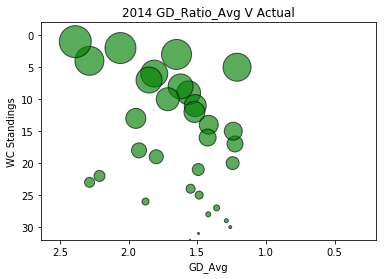

In [11]:
#2014 GD analysis
GD_data = wc_country_rating_2014[['WC_Finish','GD_Ratio_Avg']]
DG_cor =GD_data.corr(method='pearson')

plt.scatter(wc_country_rating_2014.GD_Ratio_Avg,wc_country_rating_2014.WC_Finish,facecolors="green",s=(33-(wc_country_rating_2014.WC_Finish))**2, edgecolors="black",alpha=0.65)

plt.ylim(32,-2)  # decreasing time
plt.xlim(max(wc_country_rating_2014.GD_Ratio_Avg)+.25, .2)  # decreasing time
plt.title("2014 GD_Ratio_Avg V Actual")
plt.xlabel("GD_Avg")
plt.ylabel("WC Standings", multialignment='center')
plt.savefig("2014 Goal Differential V Actual.png")
print(DG_cor)
plt.show()

                WC_Finish  Table_Pcnt_Avg
WC_Finish        1.000000       -0.335558
Table_Pcnt_Avg  -0.335558        1.000000


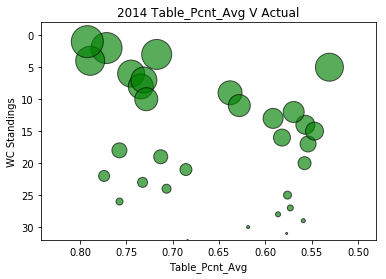

In [12]:
#2014 Table Finish analysis
win_data = wc_country_rating_2014[['WC_Finish','Table_Pcnt_Avg']]
Table_Finish_cor = win_data.corr(method='pearson')

plt.scatter(wc_country_rating_2014.Table_Pcnt_Avg,wc_country_rating_2014.WC_Finish,facecolors="green",s=(33-(wc_country_rating_2014.WC_Finish))**2, edgecolors="black",alpha=0.65)

plt.ylim(32,-2)  # decreasing time
plt.xlim(max(wc_country_rating_2014.Table_Pcnt_Avg)+.05,min(wc_country_rating_2014.Table_Pcnt_Avg)-.05)  # decreasing time
plt.title("2014 Table_Pcnt_Avg V Actual")
plt.xlabel("Table_Pcnt_Avg")
plt.ylabel("WC Standings", multialignment='center')
plt.savefig("2014 Table_Pcnt_Avg V Actual.png")

print(Table_Finish_cor)
plt.show()

             WC_Finish  Win_Pct_Avg
WC_Finish      1.00000     -0.38381
Win_Pct_Avg   -0.38381      1.00000


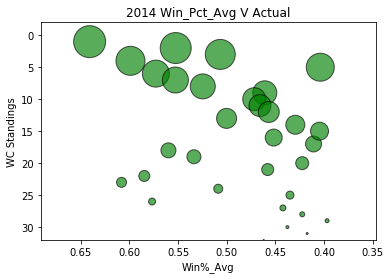

In [13]:
#2014 Win Pct Analysis
data = wc_country_rating_2014[['WC_Finish','Win_Pct_Avg']]
correlation = data.corr(method='pearson')
print(correlation)
plt.scatter(wc_country_rating_2014.Win_Pct_Avg,wc_country_rating_2014.WC_Finish,facecolors="green",s=(33-(wc_country_rating_2014.WC_Finish))**2, edgecolors="black",alpha=0.65)

plt.ylim(32,-2)  # decreasing time
plt.xlim(max(wc_country_rating_2014.Win_Pct_Avg)+.05,min(wc_country_rating_2014.Win_Pct_Avg)-.05)  # decreasing time
plt.title("2014 Win_Pct_Avg V Actual")
plt.xlabel("Win%_Avg")
plt.ylabel("WC Standings", multialignment='center')
plt.savefig("2014 Win_Pct_Avg V Actual.png")
    
plt.show()

           WC_Finish   CPR_Avg
WC_Finish   1.000000 -0.371047
CPR_Avg    -0.371047  1.000000


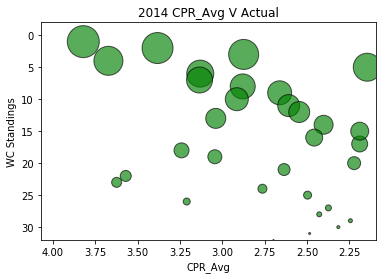

In [14]:
#2014 CPR_Avg
data = wc_country_rating_2014[['WC_Finish','CPR_Avg']]
cpr_correlation = data.corr(method='pearson')


plt.scatter(wc_country_rating_2014.CPR_Avg,wc_country_rating_2014.WC_Finish,facecolors="green",s=(33-(wc_country_rating_2014.WC_Finish))**2, edgecolors="black",alpha=0.65)

plt.title("2014 CPR_Avg V Actual")
plt.xlabel("CPR_Avg")
plt.ylabel("WC Standings", multialignment='center')
plt.ylim(32,-2)  # decreasing time
plt.xlim(max(wc_country_rating_2014.CPR_Avg)+.25,min(wc_country_rating_2014.CPR_Avg)-.05)  
plt.savefig("2014 CPR_Avg V Actual.png")
print(cpr_correlation)
plt.show()

__2014 Analysis__<br>
<table><tr><td><img src="2014 Table_Pcnt_Avg V Actual.png" width= "350"></td><td><img src="2014 Win_Pct_Avg V Actual.png" width= "350"></td><td><img src="2014 Goal Differential V Actual.png" width= "350"></td><td><img src="2014 CPR_Avg V Actual.png" width= "350"></tr></table>

2014 was much simpler the Club Power Rating had both the highest correlation and accurately  predicted Germany's first place finish.<br>


In [17]:
wc_country_rating_2014_df.head(5)

,Win %,Table_Pcnt_Avg,GD_Ratio_Avg,Win_Pct_Avg,CPR_Avg,WC_Finish
WC Country,,,,,,
Germany,0.640800,0.792029,2.388388,0.640800,3.821217,1
Brazil,0.598845,0.788911,2.285264,0.598845,3.673020,4
Spain,0.608023,0.732367,2.284007,0.608023,3.624396,23
Italy,0.584668,0.773913,2.211962,0.584668,3.570543,22
Argentina,0.552376,0.771256,2.059247,0.552376,3.382878,2


__France__ comes out on top with 3.97 club power rating for 2018.
![ffgif.gif](ffgif.gif)